In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lazypredict.Supervised import LazyRegressor

c:\Users\Vanshaj\.conda\envs\tensorflowenv_20220122\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv(r'D:\NASSCOM data\HACK-NASSCOM\complete_merged.csv',index_col=0)
df.head()

,district,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
0,Adilabad,2018-01-01,0.00,11.20,30.44,25.72,75.48,0.24,9.12
1,Adilabad,2018-01-02,0.00,12.43,33.62,13.84,57.28,0.00,9.09
2,Adilabad,2018-01-03,0.00,20.13,37.05,15.74,45.57,0.00,10.64
3,Adilabad,2018-01-04,0.00,26.15,40.43,9.00,72.45,0.08,15.73
4,Adilabad,2018-01-05,0.00,29.17,43.08,11.38,39.20,0.25,17.74


In [3]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])

> We are checking for total number of date entries for each year in the data

In [4]:
df_district = df.loc[df['district']=='Adilabad'].copy()
years = [2018,2019,2020,2021,2022]
for i in years:
    df_temp = df_district[df_district['date'].dt.year.isin([i])]
    print('Year:',i,' ',df_temp.shape[0],'days')

Year: 2018   365 days
Year: 2019   364 days
Year: 2020   366 days
Year: 2021   365 days
Year: 2022   273 days


In [5]:
def plot_data(df,year=None,month=None,day=None):
    if(year):
        df = df[df['date'].dt.year == year]
    if(month):
        df = df[df['date'].dt.month == month]
    if(day):        
        df = df[df['date'].dt.day == day]
    plt.figure()
    plt.title('Maximum Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid()
    plt.plot(df['date'],df['temp_max'])

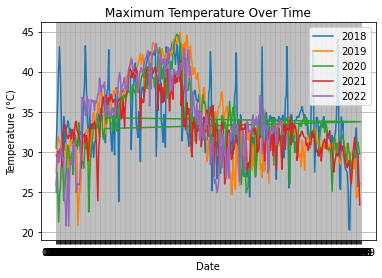

In [6]:
# %matplotlib qt
years = [2018,2019,2020,2021,2022]
# df['date'] = pd.to_datetime(df['date'])
plt.figure()
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid()

for i in years:
    df_temp = df_district[df_district['date'].dt.year == i].copy()
    # df1 = df1[df1['date'].dt.month == 3]
    df_temp['date'] = df_temp['date'].dt.strftime('%m-%d')
    plt.plot(df_temp['date'],df_temp['temp_max'],label = str(i))
plt.legend()

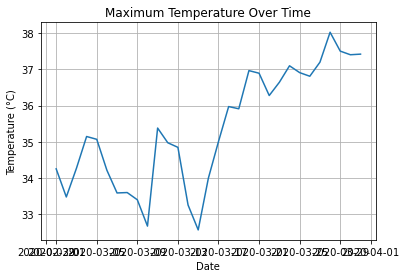

In [7]:
plot_data(df_district,year= 2020,month=3)

In [8]:
df_new = df_district.drop(columns=['date','district'])
X = df_new.drop(columns=['temp_max'])
y = df_new['temp_max']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
le = LinearRegression()

le.fit(X_train, y_train)
print(le.score(X_test, y_test))


y_pred = le.predict(X_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


0.9321144700184696
MAE: 0.8777722333716046
MSE: 1.2895335450279326
RMSE: 1.1355763052423788


In [10]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:22<00:00,  1.86it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.94,0.94,1.04,0.33
RandomForestRegressor,0.94,0.94,1.07,0.80
HistGradientBoostingRegressor,0.94,0.94,1.10,0.44
LGBMRegressor,0.93,0.94,1.11,0.08
BaggingRegressor,0.93,0.93,1.12,0.09
GradientBoostingRegressor,0.93,0.93,1.12,0.33
SGDRegressor,0.93,0.93,1.13,0.02
ElasticNetCV,0.93,0.93,1.13,0.05
HuberRegressor,0.93,0.93,1.13,0.02


## Testing ARIMA Model

In [23]:
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA

df_new = df_district.drop(columns=['district'])
# df_new = df_district[df_district['date'].dt.year.isin([2021,2020])]
# df_new = df_district[df_district['date'].dt.month.isin([1,2,3,4,5,6,7,8,9])]

train, test = train_test_split(df_new, test_size=0.2, shuffle=False)
test = test.reset_index(drop=True)

In [20]:
def run_arima(train,test):
    model = ARIMA(train['temp_max'], order=(1, 1, 1))
    model_fit = model.fit()

    start_index = test.index[0]
    end_index = test.index[-1]
    predictions = model_fit.predict(steps=len(test),start=start_index, end=end_index)

    # predictions = model_fit.forecast(steps=len(test))[0]
    mse = mean_squared_error(test['temp_max'], predictions)
    r2score = r2_score(test['temp_max'], predictions)
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2score)


    plt.plot(train['date'], train['temp_max'], label='Training data')
    plt.plot(test['date'], test['temp_max'], label='Testing data')
    plt.plot(test['date'], predictions, label='Predictions')
    plt.legend()
    plt.show()

In [21]:
def run_sarimax(train,test):

    # Define the SARIMA model
    model = SARIMAX(train['temp_max'], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))

    # Fit the model to the training data
    model_fit = model.fit()

    # Generate forecasts for the testing set
    predictions = model_fit.forecast(steps=len(test))

    # Calculate mean squared error
    mse = mean_squared_error(test['temp_max'], predictions)
    r2score = r2_score(test['temp_max'], predictions)

    # Print the MSE
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2score)

    # Plot forecasts and actual values
    plt.plot(train['date'], train['temp_max'], label='Training data')
    plt.plot(test['date'], test['temp_max'], label='Testing data')
    plt.plot(test['date'], predictions, label='Predictions')
    plt.legend()
    plt.show()


Mean Squared Error: 41.82396553757947
R2 Score: -0.7844539915509512


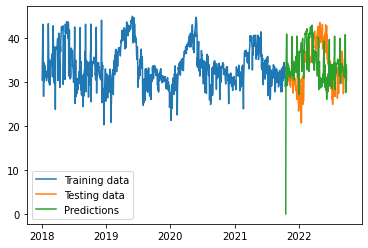

Mean Squared Error: 28.53624449784091
R2 Score: -0.2175224119361001


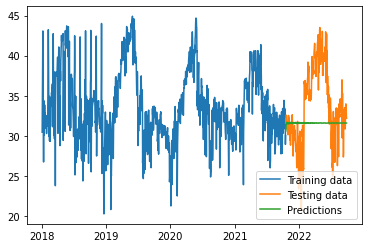

In [24]:
run_arima(train,test)
run_sarimax(train,test)